## Projet proba Pierre et Elliot 

On réutilise l'intégralité du code du projet de l'an dernier :

In [27]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special
import math
#Discrétisation
A=0
B=500
N=101
#Nombre de points de discrétisation
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization=discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a=50
sigma2=12
#Données 
depth=np.array([0,-4,-12.8,-1,-6.5,0])
observation_indexes=[0,20,40,60,80,100]

#Indices des composantes correspondant aux observations et aux componsantes non␣observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [3]:
#Fonction C
def Covexp(dist,rangeval,sigmaval):
    return sigmaval*np.exp(-dist/rangeval)

In [4]:
distmat=abs(np.subtract.outer(discretization,discretization))

In [5]:
Sigma=Covexp(distmat,a,sigma2)

In [6]:
SigmaObs=Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown=Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown=Sigma[unknown_indexes,:][:,unknown_indexes]

In [7]:
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

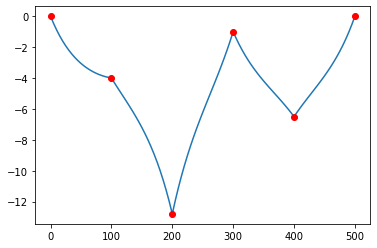

In [8]:
allval1=np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [9]:
SigmaCond=SigmaUnknown-np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

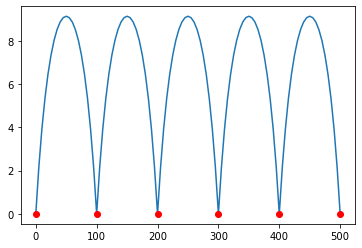

In [10]:
allval2=np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]),'ro')
plt.show()

In [11]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu=Ec+np.matmul(Cholesky,x)

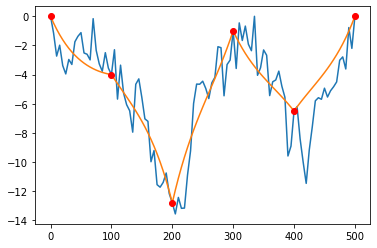

In [12]:
allval3=np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [13]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

In [14]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

In [15]:
sum(result)/K

522.4286829533406

In [16]:
length(allval1,Delta)

501.6468416918411

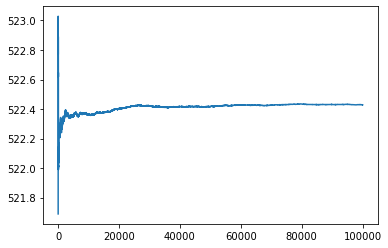

In [17]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

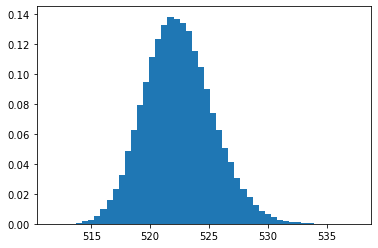

In [18]:
plt.hist(result,50,density=True)
plt.show()

In [19]:
np.quantile(result,[0.025,0.975])

array([517.0967914 , 528.45652777])

In [20]:
np.mean(result>525)

0.1832

projet 2021 :

In [24]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_r=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_r > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)

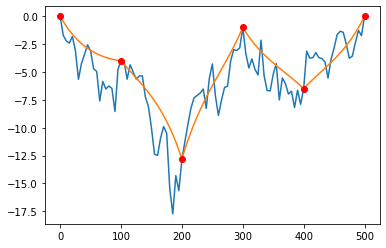

In [25]:
allval3_r=np.zeros(N)
allval3_r[unknown_indexes]=simu_r
allval3_r[observation_indexes]=depth
plt.plot(discretization,allval3_r)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

On veut estimer une moyenne du taux de rejet :

In [26]:
nombre_de_tests = 0
compteur = 1000
for indice in range(compteur):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        nombre_de_tests +=1
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
#Le taux de rejet est :
1- compteur/nombre_de_tests
    
    

0.9607612320973121

Comparons les longueures moyennes de câble nécessaire avec ou sans rejet :
    

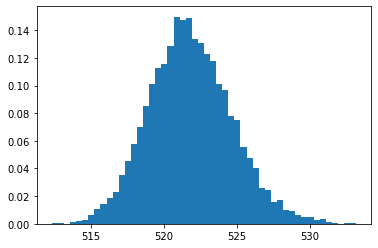

521.835003237967
[516.58137757 527.74985703]
0.1298


In [27]:
#Avec rejet
K=10000
result_r = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec + np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
    allval3_r[unknown_indexes]=simu_r
    result_r[i]=length(allval3_r,Delta)

plt.hist(result_r,50,density=True)
plt.show()
print(sum(result_r)/K)
print(np.quantile(result_r,[0.025,0.975]))
print(np.mean(result_r>525))

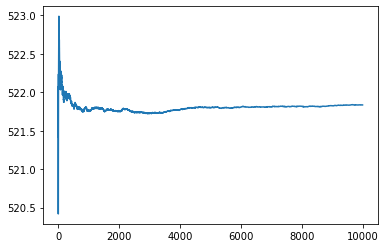

In [114]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_r)/indice_simu)
plt.show()

522.4458847185641
[517.11274518 528.45049923]
0.18662


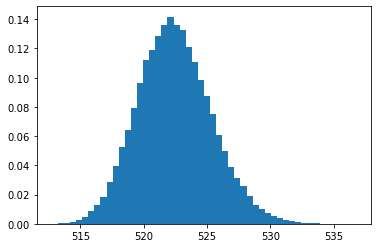

In [28]:
#Sans rejet
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
print(sum(result)/K)
print(np.quantile(result,[0.025,0.975]))
print(np.mean(result>525))

plt.hist(result,50,density=True)
plt.show()


In [29]:
# commenter


3) $f_{µ|Z_{obs}=z}(x) = \frac{f_{Z_{obs}|µ = x}(z) . f_µ(x)}{f_{Z_{obs}}(z)}$ donc 
$$
f_{µ|Z_{obs}=z}(x) \propto f_{Z_{obs}|µ = x}(z) . f_µ(x)
$$
à $z$ fixé. Comme cette fonction est d'intégrale 1 par rapport à $x$, il suffit de trouver une fonction qui soit proportionnelle à la même quantité à $z$ fixé et qui soit d'intégrale 1 pour en déduire l'égalité entre cette fonction et $f$.  
Evaluons pour celà 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x))
$$
sachant qu'on pourra donc ne pas tenir compte des termes additifs ne dépendants que de $z$.  
On rappelle que
$$
f_{Z_{obs}|µ = x}(z) = \frac{1}{(2\pi)^{n/2}\sqrt{det(C_{obs})}}exp(-\frac{1}{2}(z-x)^tC_{obs}^{-1}(z-x))
$$
et que 
$$
f_µ(x)=\frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(x+5)^2}{8})
$$
Ainsi, on a 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x)) = (z-x)^tC_{obs}^{-1}(z-x) +\frac{(x+5)^2}{4}
$$
En mettant cette expression sous forme canonique, puis en ne considérant plus le terme constant, on reconnait la densité d'un vecteur aléatoire gaussien. Le coefficient devant $x^2$ est alors identifiable à $\frac{1}{\hat \sigma^2}$ et le coefficient en $x$ est identifiable à $\frac{-2\hat µ}{\hat \sigma^2}$.  
Ici, il convient de rectifier l'abus de notation précédent: le vecteur qu'on a noté $x$ est en fait $1x$ où 1 est un vecteur et x est le scalaire. 
On obtient donc bien sans problème que 
$$
\hat \sigma^2  = (1^tC_{obs}^{-1}1+\frac{1}{4})^{-1}
$$
et en remarquant que $C_{obs}$ est symétrique et inversible puisqu'il s'agit d'une matrice de covariance et qu'il n'existe pas de relation linéaire presque sûre entre les mesures, $C_{obs}^{-1}$ est également symétrique et on peut regrouper $z^tC_{obs}^{-1}1$ et $1^t C_{obs}^{-1}z$, ce qui nous donne bien:
$$
\hat µ = \hat \sigma ^2 (1^tC_{obs}^{-1}z_{obs}-\frac{5}{4})
$$
La densité de probabilité correspondant à la loi normale de paramètre ($\hat µ$,$\hat \sigma ^2$) étant proportionnelle par construction à la fonction précédente, et étant d'intégrale 1, on peut bien conclure que 
$$
µ|Z_{obs}=z_{obs} \sim \mathcal{N}(\hat\mu,\,\hat\sigma^{2})
$$

4) On sait qu'on peut considérer $f_{|Z=z}$ comme une densité de probabilité. Appelons la $\tilde{f}$. Les formules du cours s'appliquent à $\tilde{f}$. On obtient alors l'égalité désirée.

5) Par application de la question précédente: on obtient:
$$
f_{Z_{UNK},µ|Z_{obs}=z_{obs}}(z_u,x) = f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u).f_{µ|Z_{obs}=z_{obs}}(x)
$$
On rappelle que 
$$
f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u) = \frac{1}{(2\pi)^{\frac{N+1-n}{2}}\sqrt{det(CS)}} exp(-\frac{1}{2}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})^t(CS)^{-1}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})
$$
où $CS = C_{obs}-C_{unk,obs}C_{obs}^{-1}C_{obs,unk}$ et $m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x} = x.1 + C_{unk,obs}C_{obs}^{-1}(z_{obs}-x.1)$.

#### Question 6 : Calculer $\mu$ et $\sigma^2$

In [24]:
#La question 3 donne directement 

shape_Cobs = np.shape(SigmaObs) 
UN = np.ones(shape = (shape_Cobs[0],1))
sigma2_chap = (UN.T@np.linalg.inv(SigmaObs)@UN + 0.25)**-1
sigma2_chap = sigma2_chap[0][0]
f'La valeur de la variance de mu sachant les variables observées est donc {sigma2_chap:.3f}'

'La valeur de la variance de mu sachant les variables observées est donc 1.537'

In [25]:
mu_chap = sigma2*(UN.T@np.linalg.inv(SigmaObs)@depth- 1.25)
mu_chap = mu_chap[0]
f"La valeur de l'espérance de mu sachant les variables observées est {mu:.3f}"

"La valeur de l'espérance de mu sachant les variables observées est -5.000"

#### Question 7

On sait que $P(µ>0) = 1/2 - \frac{1}{2}erf(-\frac{\hat µ}{\hat \sigma \sqrt{2}})$. On code donc:

In [34]:
proba_mu_positif = 0.5 - 0.5*scipy.special.erf(-mu_chap/(sigma2_chap*math.sqrt(2)))
proba_mu_positif

0.0

Il est très en effet très peu probable que $µ$ soit positif.

In [106]:
#Pour simuler mu sachant Zobs, avec mu négatif on se propose une méthode du rejet :
mu_cond = np.random.normal(mu_chap, sigma2_chap,)
while mu_cond > 0 :
    mu_cond = np.random.normal(mu_chap, sigma2_chap)

mu_cond

-0.5266347473153103

#### Question 8 

In [107]:
#Soit mu = mu_cond :
mu = mu_cond
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_mu=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_mu > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec+np.matmul(Cholesky,x)
mu

-0.5266347473153103

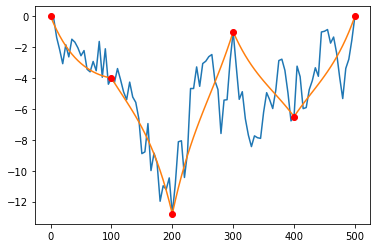

In [108]:
allval3_mu=np.zeros(N)
allval3_mu[unknown_indexes]=simu_mu
allval3_mu[observation_indexes]=depth
plt.plot(discretization,allval3_mu)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

#### Question 9 :

521.4171110222254


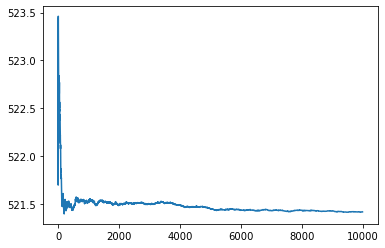

In [113]:
K=10000
result_mu = np.zeros(K)

for i in range(K):
    mu_cond = np.random.normal(mu_chap, sigma2_chap,)
    while mu_cond > 0 :
        mu_cond = np.random.normal(mu_chap, sigma2_chap)
    mu = mu_cond
    invSigma=np.linalg.inv(SigmaObs)
    Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec + np.matmul(Cholesky,x)
    while True in (simu_mu > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_mu=Ec+np.matmul(Cholesky,x)
    allval3_mu[unknown_indexes]=simu_mu
    result_mu[i]=length(allval3_mu,Delta)
    
print(sum(result_mu)/K)
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_mu)/indice_simu)
plt.show()

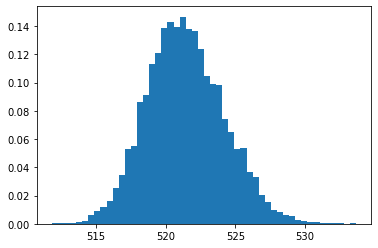

In [116]:
plt.hist(result_mu,50,density=True)
plt.show()

In [117]:
np.quantile(result_mu,[0.025,0.975])

array([516.35775581, 527.08537761])

In [118]:
np.mean(result_mu > 525)

0.1067